<a href="https://colab.research.google.com/github/sampath11/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/Sampath_Kumar_LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-05-13 03:05:59--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.41.174
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.41.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  85.4MB/s    in 2.3s    

2020-05-13 03:06:08 (85.4 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
##### YOUR CODE HERE #####


## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [2]:
### Lets replicate the code from class

#source all imports here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
## concats
df1 = pd.DataFrame ( [['a',1], ['b',2]], columns=['alpha', 'numbers'])
df1

,alpha,numbers
0,a,1
1,b,2


In [7]:
df2 = pd.DataFrame ( [['c', 3], ['d', 4]], columns = ['alpha', 'numbers'])
df2

,alpha,numbers
0,c,3
1,d,4


In [9]:
df3 = pd.concat ([df1, df2], axis=0)
df3

,alpha,numbers
0,a,1
1,b,2
0,c,3
1,d,4


In [10]:
df4 = pd.concat ( [df1, df2], axis = 1)
df4

,alpha,numbers,alpha,numbers
0,a,1,c,3
1,b,2,d,4


In [13]:
## Merge

names_d= {'Symbol': ['AMZN', 'MSFT', 'FB', 'AAPL', 'GOOGL'], 
          'Name': ['Amazon', 'Microsoft', 'Facebook', 'Apple', 'Google']}

stocks = pd.DataFrame (names_d)
stocks

,Symbol,Name
0,AMZN,Amazon
1,MSFT,Microsoft
2,FB,Facebook
3,AAPL,Apple
4,GOOGL,Google


In [14]:
price_d = {'Symbol': ['AAPL', 'MSFT', 'GOOGL', 'FB', 'AMZN'], 
           'OpenPrice': [217.51, 96.54, 501.3, 51.45, 1703.34]}
          
price = pd.DataFrame (price_d)
price


,Symbol,OpenPrice
0,AAPL,217.51
1,MSFT,96.54
2,GOOGL,501.30
3,FB,51.45
4,AMZN,1703.34


In [17]:
## lets do merge
stock_price = pd.merge (stocks, price)
stock_price

,Symbol,Name,OpenPrice
0,AMZN,Amazon,1703.34
1,MSFT,Microsoft,96.54
2,FB,Facebook,51.45
3,AAPL,Apple,217.51
4,GOOGL,Google,501.30


In [18]:
weekly_d = {'Symbol': ['FB', 'AMZN', 'AAPL', 'MSFT', 'NFLX'], 
            '52wkHigh': [60.79, 2050.49, 233.47, 110.11, 303.22]}
wkhigh = pd.DataFrame(weekly_d)
wkhigh


,Symbol,52wkHigh
0,FB,60.79
1,AMZN,2050.49
2,AAPL,233.47
3,MSFT,110.11
4,NFLX,303.22


In [21]:
full_stock = pd.merge ( stock_price, wkhigh )
full_stock

,Symbol,Name,OpenPrice,52wkHigh
0,AMZN,Amazon,1703.34,2050.49
1,MSFT,Microsoft,96.54,110.11
2,FB,Facebook,51.45,60.79
3,AAPL,Apple,217.51,233.47


In [22]:
full_stock = pd.merge ( stock_price, wkhigh, how='outer', on='Symbol')
full_stock

,Symbol,Name,OpenPrice,52wkHigh
0,AMZN,Amazon,1703.34,2050.49
1,MSFT,Microsoft,96.54,110.11
2,FB,Facebook,51.45,60.79
3,AAPL,Apple,217.51,233.47
4,GOOGL,Google,501.30,NaN
5,NFLX,NaN,NaN,303.22


In [23]:
full_stock = pd.merge ( stock_price, wkhigh, how='inner', on='Symbol')
full_stock

,Symbol,Name,OpenPrice,52wkHigh
0,AMZN,Amazon,1703.34,2050.49
1,MSFT,Microsoft,96.54,110.11
2,FB,Facebook,51.45,60.79
3,AAPL,Apple,217.51,233.47


In [24]:
full_stock = pd.merge ( stock_price, wkhigh, how='left', on='Symbol')
full_stock

,Symbol,Name,OpenPrice,52wkHigh
0,AMZN,Amazon,1703.34,2050.49
1,MSFT,Microsoft,96.54,110.11
2,FB,Facebook,51.45,60.79
3,AAPL,Apple,217.51,233.47
4,GOOGL,Google,501.30,NaN


In [0]:
## now lets do reshape and pivots


## create tble

myindex=['John Smith', 'Jane Doe', 'Mary Johnson']
mycolumns=['treatmenta', 'treatmentb']


table1 = pd.DataFrame(
    [[np.nan, 2],
     [16, 11],
     [3,1]],
     index=myindex,
     columns=mycolumns
)

In [30]:
df_table1 = pd.DataFrame ( table1)
df_table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [31]:
## transpose
df_table2 = df_table1.T
df_table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [32]:
## to do reshapee to tidy format 
# First, get the column names as a list.
cols = df_table1.columns.tolist()
cols

['treatmenta', 'treatmentb']

In [33]:
## get index values as a list

index = df_table1.index.tolist()

index

['John Smith', 'Jane Doe', 'Mary Johnson']

In [34]:
# For table 1, convert the index into a column using the `reset_index` method.
df_table1 = table1.reset_index()
df_table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [36]:
# Convert the table from 'wide' to 'tidy' format using the `melt` method.
tidy1 = df_table1.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])
tidy1

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [37]:
# rename the columns
tidy1 = tidy1.rename(columns={
    'index':'name',
    'variable':'trt',
    'value':'result'
})
tidy1

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [38]:
# shorten the `trt` values
tidy1['trt'] = tidy1['trt'].str.replace('treatment', '')
tidy1

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


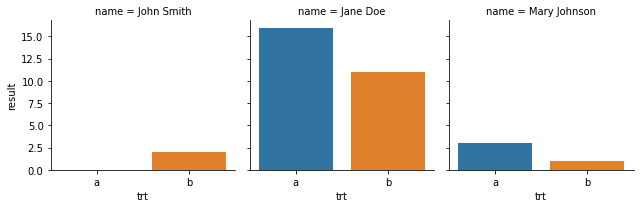

In [39]:
## do an sns plot
sns.catplot(x='trt',
            y='result',
            col='name',
            kind='bar',
            data=tidy1,
            height=3);

In [1]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [0]:
# table2 -> tidy

In [0]:
# tidy -> table2

In [0]:
flights = sns.load_dataset('flights')

In [0]:
# Flights Pivot Table

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####